In [1]:
# In this notebook i will be looking into a Decision Tree model for the Yen method

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from itertools import chain, combinations

In [2]:
# Loading Data
df = pd.read_csv('Target variable & features.csv')

In [3]:
df

,Unnamed: 0,Threshold method,Threshold: area spread,Threshold: border,Threshold: count,Threshold: fill,Threshold: intensity,Threshold: separation,User score
0,0,yen,0.265214,1.866963,13.192785,0.215541,1.711409,0.106493,9
1,1,minimum,0.601553,1.119458,91.000000,0.541977,1.062500,0.018770,1
2,2,yen,0.154306,5.648380,0.010033,0.184900,4.396552,0.355659,4
3,3,yen,0.012426,1.814439,2.246626,0.184488,1.734694,0.139754,1
4,4,yen,0.408562,4.563709,0.019553,0.220224,2.833333,0.162283,2
...,...,...,...,...,...,...,...,...,...
144,144,yen,0.800244,1.757421,9.000000,1.000000,2.431401,0.082923,2
145,145,yen,0.800244,1.757421,9.000000,1.000000,2.431401,0.082923,2
146,146,triangle,1.184838,2.893748,67.500000,0.588592,5.375511,0.067293,5
147,147,yen,0.079468,10.559311,2.823232,0.197917,7.083333,0.433293,5


In [4]:
# For the Binary Decision Tree
# The two classes are: 
# - 0 (score < 6)
# - 1 (score => 6)

# Create binary attribute
df['binary_score'] = df['User score'] >= 6

In [6]:
from itertools import chain, combinations
attributes = ['Threshold: separation', 'Threshold: border', 'Threshold: area spread' , 'Threshold: fill', 'Threshold: count', 'Threshold: intensity']

def all_subsets(ss):
    return chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1)))

subsets = list(all_subsets(attributes))
accuracy_scores_all = []

for subset in subsets:
    X = df[list(subset)]
    y = df['binary_score']
    
    #SPlit data into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y.astype(np.integer), test_size=0.25, random_state=1, stratify=y)
    
    #Scaling of dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Create classify Tree
    classify_tree = DecisionTreeClassifier(max_depth=10, random_state=1)
    
    #Train model
    classify_tree.fit(X_train, y_train)
    
    y_predict = classify_tree.predict(X_test)
    
    accuracy_scores_all.append(accuracy_score(y_test, y_predict))

63


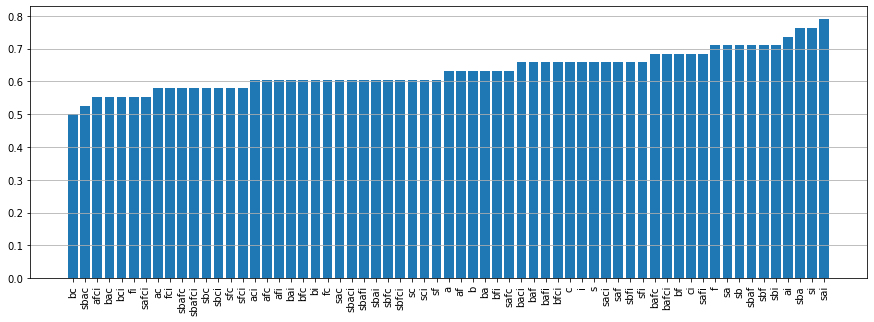

In [7]:
# Visualize the combinations 
subset_labels = []
for subset in subsets:
    subset_label = ''
    for i in range(len(subset)):
        subset_label += subset[i][11]
    subset_labels.append(subset_label)
    
plt.figure(figsize=(15,5))
t = [(a, l) for a, l in zip(accuracy_scores_all, subset_labels)]
t.sort()
accuracy,labels = zip(*t)

plt.bar(range(len(accuracy)), accuracy, tick_label=labels)
plt.xticks(np.arange(len(accuracy)), labels, rotation=90)
plt.grid(True, axis= 'y')
plt.show()